# 驗證模型的各項指標

參考文件
1. http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://blog.csdn.net/cherdw/article/details/55813071
3. http://alexkong.net/2013/06/introduction-to-auc-and-roc/

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets

##  範例
取得資料集，目標製作一個二元分類器

In [3]:
import pandas as pd

In [4]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

將Y轉乘one-hot vector

In [7]:
Y_2 = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y_2.shape[1]
print("n_classes:%d"%n_classes)

n_classes:3


無聊增加800個沒意義的變數，讓問題變更難一點，最後產出804個變數(features)

In [8]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
print("n_samples:%d, n_features:%d"%X.shape)
X_2 = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
pd.DataFrame(X_2).head()

n_samples:150, n_features:4


,0,1,2,3,4,5,6,7,8,9,...,794,795,796,797,798,799,800,801,802,803
0,5.1,3.5,1.4,0.2,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,...,-0.757871,-0.050084,-0.897401,1.312470,-0.858972,-0.898942,0.074586,-1.077099,-0.424663,-0.829965
1,4.9,3.0,1.4,0.2,1.411172,0.785804,-0.057470,-0.391217,0.940918,0.405204,...,-1.116950,-0.035297,0.241204,1.127784,0.881131,1.032989,-0.923912,1.412152,-1.380431,-0.535915
2,4.7,3.2,1.3,0.2,0.430771,-0.149892,-1.006037,-0.821550,-1.548254,0.531975,...,-0.110591,-0.432432,1.077037,-0.224827,-0.576242,0.574609,-0.489828,0.658802,-0.596917,-0.222959
3,4.6,3.1,1.5,0.2,0.152177,-0.374126,-0.013451,0.815472,0.410602,0.480970,...,0.847408,-0.198720,1.575307,0.849115,-1.228895,0.888394,-0.516487,-0.083326,0.131054,-0.879096
4,5.0,3.6,1.4,0.2,-1.333342,0.367784,-1.388233,-2.575203,-0.836106,0.331092,...,-1.468367,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802


分割資料為 train 與 test 資料集，比例為0.5,0.5，平均75,75筆

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size=.5,random_state=0)
X_test.shape

建立模型

In [13]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
model = classifier.fit(X_train, Y_train)

取得score

In [17]:
Y_score = model.decision_function(X_test)

In [48]:
Y_score_2 = model.predict_proba(X_test)

In [53]:
Y_predict = model.predict(X_test)

In [54]:
Y_predict[:5]

array([[0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [49]:
Y_score_2

array([[0.08669583, 0.25924479, 0.77485388],
       [0.39268523, 0.27973152, 0.48654473],
       [0.65825399, 0.29338307, 0.32291824],
       [0.05710482, 0.24161451, 0.68607733],
       [0.55342814, 0.25288561, 0.07513447],
       [0.13998493, 0.25793953, 0.60566473],
       [0.58202625, 0.25037944, 0.05806721],
       [0.13755949, 0.22036529, 0.13520219],
       [0.2626843 , 0.25005352, 0.26037956],
       [0.20518789, 0.25127836, 0.37022304],
       [0.23337524, 0.25462754, 0.36501396],
       [0.29030882, 0.28539371, 0.68946208],
       [0.3733499 , 0.28045186, 0.52168785],
       [0.5       , 0.26671005, 0.20475722],
       [0.17202911, 0.25185705, 0.44887421],
       [0.64781592, 0.27362281, 0.14047187],
       [0.10105792, 0.23582331, 0.40278691],
       [0.1639504 , 0.24260805, 0.33264595],
       [0.82497357, 0.30932927, 0.25865055],
       [0.46837367, 0.30243898, 0.69505883],
       [0.10304186, 0.23737339, 0.43376707],
       [0.54239449, 0.2663688 , 0.16473226],
       [0.

計算作圖資料

In [50]:
fpr = dict()
tpr = dict()
roc_auc = dict()
# 針對不同class 給予不同的作圖
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# 其中 np.ravel() 就是做 flatten但不做變數clone，直接回傳reference
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [22]:
Y_test.ravel()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0])

In [51]:
roc_auc

{0: 0.9118165784832452,
 1: 0.3970370370370371,
 2: 0.7859477124183007,
 'micro': 0.7274666666666667}

In [52]:
roc_auc["micro"]

0.7274666666666667

### 作圖

- FPR = 預測發生，佔整體不預測發生的比率，表示錯誤預警 = NP / N
- TPR = 預測發生，佔整體發生的比率，表示確實預警率 = TP / P
- 最理想狀況 (FPR,TPR) = (0,1), 但是最糟糕就是 (FPR,TPR) = (1,0), 然後全部預測不會發生就是(0,0) 預測全部發生就會是(1,1)
- 所以最理想的預測就是整個曲線越往左上越好
- 基本上在AUC上，y = x (AUC=0.5) 幾乎就是隨機作圖的成果，任一個模型應該都會是比這個好，因為反指標就逆向拿來做就可以了

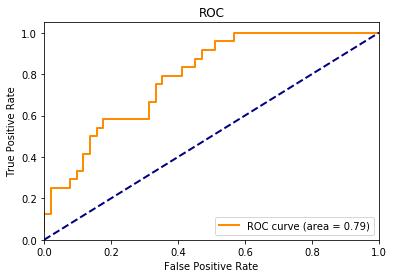

In [26]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [42]:
from sklearn.metrics import log_loss, recall_score, precision_score, accuracy_score,f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [55]:
i = 0
y_test,y_test_p,y_test_v = Y_test[:, i], Y_score_2[:, i], Y_predict[:,i]

In [56]:
print('auc: %f'%roc_auc_score(y_test, y_test_p))
print('precision: %f'%precision_score(y_test, y_test_v))
print('recall: %f'%recall_score(y_test, y_test_v))
print('accuracy: %f'%accuracy_score(y_test, y_test_v))
print('f1_score: %f'%f1_score(y_test, y_test_v))

auc: 0.911817
precision: 0.733333
recall: 0.523810
accuracy: 0.813333
f1_score: 0.611111


In [57]:
y_test_v

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [61]:
Y_predict

array([[0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0,

In [58]:
y_test_p

array([0.08669583, 0.39268523, 0.65825399, 0.05710482, 0.55342814,
       0.13998493, 0.58202625, 0.13755949, 0.2626843 , 0.20518789,
       0.23337524, 0.29030882, 0.3733499 , 0.5       , 0.17202911,
       0.64781592, 0.10105792, 0.1639504 , 0.82497357, 0.46837367,
       0.10304186, 0.54239449, 0.35598277, 0.66498054, 0.11119694,
       0.49465671, 0.53518983, 0.52053359, 0.45215773, 0.40026087,
       0.27184674, 0.37232235, 0.51025874, 0.17659558, 0.24686796,
       0.27936335, 0.51371142, 0.0280255 , 0.71536791, 0.52592201,
       0.19911825, 0.70006576, 0.2380713 , 0.55361222, 0.5766175 ,
       0.4612879 , 0.10265535, 0.08398601, 0.13616158, 0.04739541,
       0.30854574, 0.30139471, 0.27807017, 0.66080943, 0.11746382,
       0.16370814, 0.16093232, 0.24000137, 0.19202106, 0.62126576,
       0.37068251, 0.78375379, 0.70116101, 0.4016853 , 0.22911161,
       0.11278034, 0.29427928, 0.04612815, 0.58061171, 0.49305475,
       0.23771291, 0.31268725, 0.71031704, 0.75126668, 0.24710

In [60]:
Y_score_2

array([[0.08669583, 0.25924479, 0.77485388],
       [0.39268523, 0.27973152, 0.48654473],
       [0.65825399, 0.29338307, 0.32291824],
       [0.05710482, 0.24161451, 0.68607733],
       [0.55342814, 0.25288561, 0.07513447],
       [0.13998493, 0.25793953, 0.60566473],
       [0.58202625, 0.25037944, 0.05806721],
       [0.13755949, 0.22036529, 0.13520219],
       [0.2626843 , 0.25005352, 0.26037956],
       [0.20518789, 0.25127836, 0.37022304],
       [0.23337524, 0.25462754, 0.36501396],
       [0.29030882, 0.28539371, 0.68946208],
       [0.3733499 , 0.28045186, 0.52168785],
       [0.5       , 0.26671005, 0.20475722],
       [0.17202911, 0.25185705, 0.44887421],
       [0.64781592, 0.27362281, 0.14047187],
       [0.10105792, 0.23582331, 0.40278691],
       [0.1639504 , 0.24260805, 0.33264595],
       [0.82497357, 0.30932927, 0.25865055],
       [0.46837367, 0.30243898, 0.69505883],
       [0.10304186, 0.23737339, 0.43376707],
       [0.54239449, 0.2663688 , 0.16473226],
       [0.

## K-S
1. https://zhuanlan.zhihu.com/p/25993786
2. http://www.cnblogs.com/huadongw/p/6415447.html

In [162]:
# a= np.random.rand(100)
bins = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [32]:
# category.sort_values()

[(-0.1, 0.1], (0.4, 0.5], (0.4, 0.5], (0.4, 0.5], (0.4, 0.5], (0.5, 0.6], (0.5, 0.6], (0.6, 0.7], (0.9, 1.0], (0.9, 1.0]]
Categories (10, interval[float64]): [(-0.1, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [33]:
# b= category.sort_values()

In [34]:
# len(bins)

11

In [136]:
data = {"Y":y_test,"Y_hat":y_test_p}
df = pd.DataFrame(data)
df.head()

,Y,Y_hat
0,0,0.086696
1,0,0.392685
2,1,0.658254
3,0,0.057105
4,1,0.553428


In [137]:
category = pd.cut(df["Y_hat"],bins=bins)
category = category.sort_values()

In [148]:
category

0     (-0.1, 0.1]
67    (-0.1, 0.1]
49    (-0.1, 0.1]
47    (-0.1, 0.1]
37    (-0.1, 0.1]
3     (-0.1, 0.1]
5      (0.1, 0.2]
40     (0.1, 0.2]
24     (0.1, 0.2]
46     (0.1, 0.2]
48     (0.1, 0.2]
20     (0.1, 0.2]
54     (0.1, 0.2]
16     (0.1, 0.2]
55     (0.1, 0.2]
17     (0.1, 0.2]
56     (0.1, 0.2]
58     (0.1, 0.2]
65     (0.1, 0.2]
7      (0.1, 0.2]
14     (0.1, 0.2]
33     (0.1, 0.2]
34     (0.2, 0.3]
57     (0.2, 0.3]
52     (0.2, 0.3]
64     (0.2, 0.3]
66     (0.2, 0.3]
42     (0.2, 0.3]
70     (0.2, 0.3]
35     (0.2, 0.3]
         ...     
63     (0.4, 0.5]
13     (0.4, 0.5]
19     (0.4, 0.5]
45     (0.4, 0.5]
29     (0.4, 0.5]
28     (0.4, 0.5]
25     (0.4, 0.5]
21     (0.5, 0.6]
32     (0.5, 0.6]
6      (0.5, 0.6]
68     (0.5, 0.6]
27     (0.5, 0.6]
36     (0.5, 0.6]
4      (0.5, 0.6]
39     (0.5, 0.6]
26     (0.5, 0.6]
43     (0.5, 0.6]
44     (0.5, 0.6]
23     (0.6, 0.7]
15     (0.6, 0.7]
53     (0.6, 0.7]
2      (0.6, 0.7]
59     (0.6, 0.7]
62     (0.7, 0.8]
38     (0.

In [138]:
# 重新排順序
Y = df.loc[category.index,:]['Y']
Y_hat = df.loc[category.index,:]['Y_hat']
df2 = pd.concat([Y,Y_hat],axis=1)
df3 = pd.pivot_table(df2,values = ['Y_hat'],index ='Y_hat',columns='Y',aggfunc=len,fill_value=0)
df4 = np.cumsum(df3)
df5 = df4/df4.max(axis=0)
ks = np.max(abs(df5.iloc[:,0] - df5.iloc[:,1]))

In [164]:
data = {"Y":y_test,"Y_hat":y_test_p}
df = pd.DataFrame(data)
df['group'] = pd.cut(df["Y_hat"], bins= bins, right=False)
df.head()

,Y,Y_hat,group
0,0,0.086696,"[0.0, 0.1)"
1,0,0.392685,"[0.3, 0.4)"
2,1,0.658254,"[0.6, 0.7)"
3,0,0.057105,"[0.0, 0.1)"
4,1,0.553428,"[0.5, 0.6)"


In [167]:
df3 = pd.pivot_table(df.sort_values(by='group'),values = ['group'],index='group',columns='Y',aggfunc=len,fill_value=0)
df4 = np.cumsum(df3)
df5 = df4/df4.max(axis=0)
ks = np.max(abs(df5.iloc[:,0] - df5.iloc[:,1]))
print('ks: %0.2f'%ks)

ks: 0.75


In [168]:
ind = abs(df5.iloc[:,0] - df5.iloc[:,1]).values.argmax()
ind

3

In [140]:
b = abs(df5.iloc[:,0] - df5.iloc[:,1])

In [102]:
ks

0.7566137566137566

In [145]:
Y_hat.reset_index(drop=True)

0     0.086696
1     0.046128
2     0.047395
3     0.083986
4     0.028026
5     0.057105
6     0.139985
7     0.199118
8     0.111197
9     0.102655
10    0.136162
11    0.103042
12    0.117464
13    0.101058
14    0.163708
15    0.163950
16    0.160932
17    0.192021
18    0.112780
19    0.137559
20    0.172029
21    0.176596
22    0.246868
23    0.240001
24    0.278070
25    0.229112
26    0.294279
27    0.238071
28    0.237713
29    0.279363
        ...   
45    0.401685
46    0.500000
47    0.468374
48    0.461288
49    0.400261
50    0.452158
51    0.494657
52    0.542394
53    0.510259
54    0.582026
55    0.580612
56    0.520534
57    0.513711
58    0.553428
59    0.525922
60    0.535190
61    0.553612
62    0.576617
63    0.664981
64    0.647816
65    0.660809
66    0.658254
67    0.621266
68    0.701161
69    0.715368
70    0.751267
71    0.700066
72    0.710317
73    0.783754
74    0.824974
Name: Y_hat, Length: 75, dtype: float64

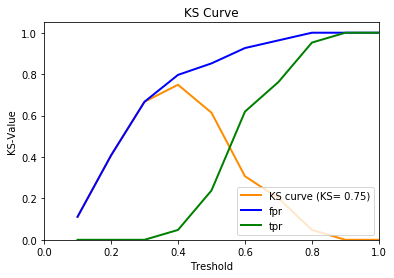

In [170]:
plt.figure()
lw = 2
plt.plot(bins[1:],abs(df5.iloc[:,0] - df5.iloc[:,1]), color='darkorange',lw=lw, label='KS curve (KS= %0.2f)' % ks)
plt.plot(bins[1:], df5.iloc[:,0].reset_index(drop=True), color='blue',lw=lw, label='fpr')
plt.plot(bins[1:], df5.iloc[:,1].reset_index(drop=True), color='green',lw=lw, label='tpr')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Treshold')
plt.ylabel('KS-Value')
plt.title('KS Curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
# 資料區分原來的Y 與 預測的Y
data = {"Y":y_test,"Y_hat":y_test_p}
df = pd.DataFrame(data)
# 將資料區分為10等分
bins = np.array([-0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

category = pd.cut(df["Y_hat"],bins=bins)
category = category.sort_values()
#max_index = len(np.unique(df["Y_hat"]))
Y = df.ix[category.index,:]['Y']
Y_hat = df.ix[category.index,:]['Y_hat']
df2 = pd.concat([Y,Y_hat],axis=1)
df3 = pd.pivot_table(df2,values = ['Y_hat'],index ='Y_hat',columns='Y',aggfunc=len,fill_value=0)
df4 = np.cumsum(df3)
df5 = df4/df4.iloc[:,1].max()
ks = max(abs(df5.iloc[:,0] - df5.iloc[:,1]))
#return ks/len(bins)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
